In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
df = pd.read_csv("/content/Salary_Data.csv")

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [7]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [8]:
df.describe(include=np.number)

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<ipython-input-9-05e4332d300a>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


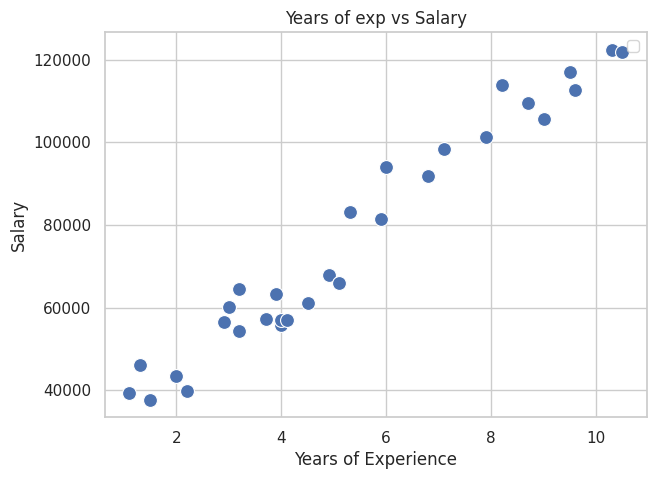

In [9]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.set_theme(style="whitegrid")  # Similar to ggplot's clean grid design
sns.scatterplot(data=df,x="YearsExperience",y="Salary",marker = "o",color ='b',s=100)
plt.title("Years of exp vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-10-4d2f23cc95d5>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


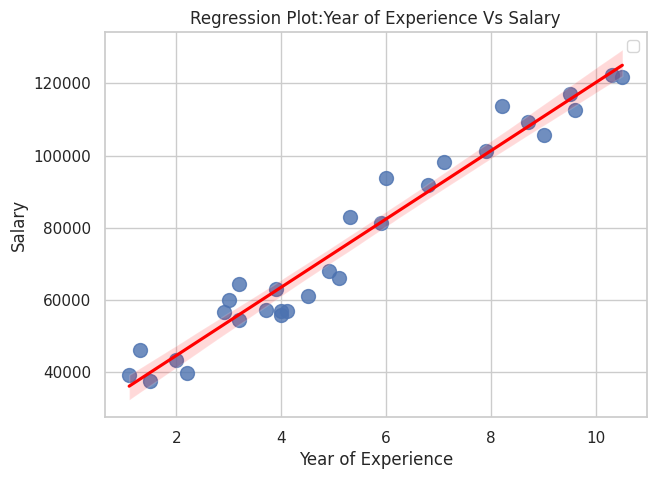

In [10]:
#Visualize the linear relationship using seaborn's regplot
plt.figure(figsize=(7,5))
sns.regplot(x='YearsExperience',y='Salary',data=df,scatter_kws={'s':100},line_kws={'color':'red'})
plt.title("Regression Plot:Year of Experience Vs Salary")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

In [18]:
x = df.drop("Salary",axis="columns")
y = df["Salary"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [21]:
print("Intercept : ",model.intercept_)
print("Coefficent : ",model.coef_[0])

Intercept :  25321.583011776813
Coefficent :  9423.815323030976


In [22]:
x_test = x_test.values.reshape(-1, 1)
y_pred = model.predict(x_test)
print("Predicted salaries:", y_pred)


Predicted salaries: [115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 49830096.85590839
R-squared: 0.9024461774180497


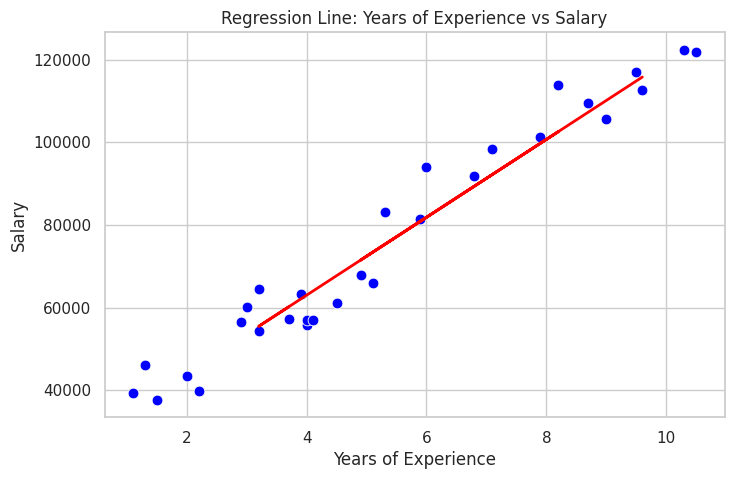

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='blue', s=60)
plt.plot(x_test, y_pred, color='red', linewidth=2)  # Regression line
plt.title("Regression Line: Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()
